## 1. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf

from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data (Data Collection)

In [2]:
news=pd.read_csv('..\\may 5 batch codes\\Data files\\NewspaperData.csv')

In [3]:
news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
news.shape

(34, 3)

In [5]:
#news.isnull().sum() -- both isna() and isnull() are same. na is alias for null. na is commonly used.
news.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
news.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

In [7]:
news.columns

Index(['Newspaper', 'daily', 'sunday'], dtype='object')

### 3.2 Perform Assumption Check

### 3.2.1 Linearity Test (To check if input and output are linearly distributed)

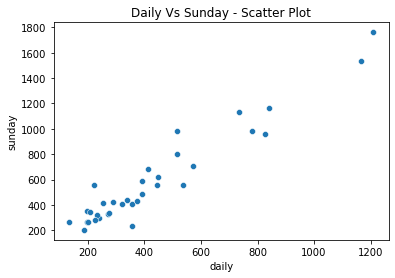

In [8]:
sns.scatterplot(x='daily',y='sunday',data=news)
plt.title('Daily Vs Sunday - Scatter Plot')
plt.show()

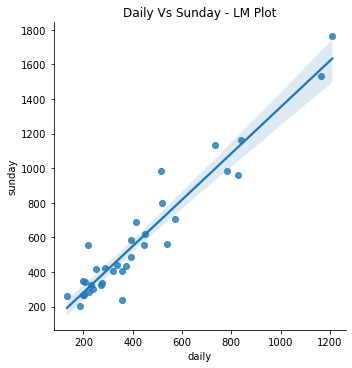

In [9]:
sns.lmplot(x='daily',y='sunday',data=news)
plt.title('Daily Vs Sunday - LM Plot')
plt.show()

Linearity Test is failed

### 3.2.2 Normality Test (To check if the input is normally distributed)

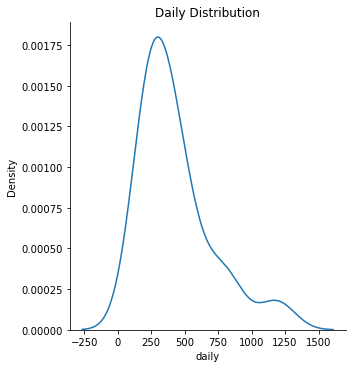

In [10]:
#sns.distplot(a=news['daily'],hist=False)      #displot and distplot are same. displot is preferable.
sns.displot(data=news,x='daily',kind='kde')
plt.title('Daily Distribution')
plt.show()

Normality Test is failed

### 3.2.3. No Multicollinearity

Can't be checked here since we are having only one input feature

### 3.2.4. No Auto Regression

Here we dont have input features with datetime datatype.

### 3.2.5. Homoscedasticity Test || 3.2.6. Zero Residual Mean

This can be performed only after **Model Training**

## 4. Data Preparation

In [11]:
news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [12]:
del news['Newspaper']

In [13]:
news.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [14]:
news.isna().sum()

daily     0
sunday    0
dtype: int64

In [15]:
news.dtypes

daily     float64
sunday    float64
dtype: object

## 5. Model Building || 6. Model Training

Linear Regression can be built by using any of the below 2 libraries.

1. StatsModels
2. Sklearn

### Using Statsmodels

In [16]:
statmodel = smf.ols(formula='sunday~daily', data=news).fit()

In [17]:
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           6.02e-19
Time:                        11:24:46   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
statmodel.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [19]:
statmodel.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

## 7. Model Testing

**Manual Prediction**

y = mx + c

In [20]:
1.339715*10 + 13.835630

27.232779999999998

In [21]:
1.339715*20 + 13.835630

40.62993

In [22]:
1.339715*30 + 13.835630

54.027080000000005

**Automatic Prediction**

In [23]:
x_test = pd.DataFrame(data={'daily':[10,20,30]})
x_test

,daily
0,10
1,20
2,30


In [24]:
statmodel.predict(x_test)

0    27.232777
1    40.629925
2    54.027073
dtype: float64

## 8. Model Evaluation

******* **Park** ********

## 9. Model Deployment

In [29]:
dump(obj=statmodel,file=open('intelligence_file1.pkl','wb'))

In [30]:
loaded_file = load(file=open('intelligence_file1.pkl','rb'))

In [31]:
loaded_file.predict(x_test)

0    27.232777
1    40.629925
2    54.027073
dtype: float64

## 10. Comments

Since P value is less than 0.5, It is significantly correct.

## End